In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import moviepy.editor as mp

In [2]:
def cvt(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def dark(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

In [3]:
video = cv2.VideoCapture('../data/20230514192027.mp4')
# print video info
print('fps: ', video.get(cv2.CAP_PROP_FPS))
print('width: ', video.get(cv2.CAP_PROP_FRAME_WIDTH))
print('height: ', video.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('frame count: ', video.get(cv2.CAP_PROP_FRAME_COUNT))

fps:  30.0
width:  1920.0
height:  1080.0
frame count:  5068.0


1.0


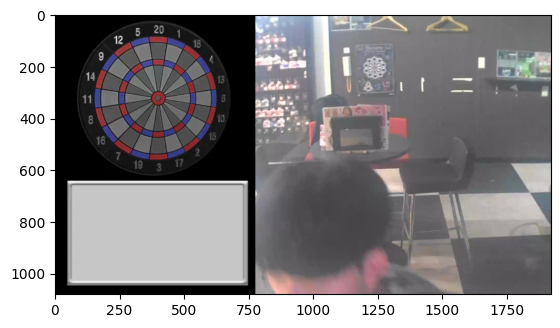

In [4]:
# set frame position
# video.set(cv2.CAP_PROP_POS_FRAMES, 700)
cap, frame = video.read()
print(video.get(cv2.CAP_PROP_POS_FRAMES))
plt.imshow(cvt(frame))

(1080, 1140, 3)

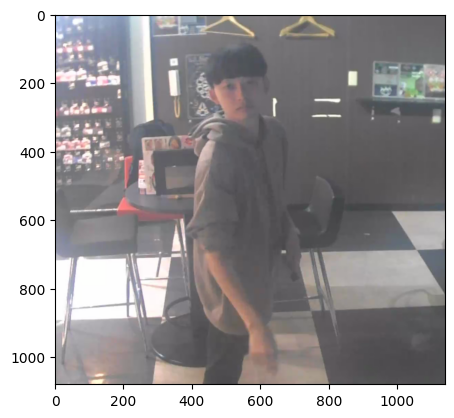

In [19]:
plt.imshow(cvt(frame[:, 780:]))
frame[:, 780:].shape
# num = pytesseract.image_to_string(dark(frame[970:1030, 430:540]), config='--psm 7')
# print(num)

In [76]:
video = cv2.VideoCapture('../data/20230514192027.mp4')
video.set(cv2.CAP_PROP_POS_FRAMES, 500)
now_score = 0
while True:
    ret, frame = video.read()
    if not ret:
        break
    num = pytesseract.image_to_string(dark(frame[970:1030, 430:540]), config='--psm 7')
    try:
        num = int(num)
    except:
        continue
    if 0 <= num < 1000 and num >= now_score and num-now_score <= 60:
        if num == now_score:
            continue
        else:
            print(f'{now_score} -> {num}, {video.get(cv2.CAP_PROP_POS_FRAMES)/30:.2f}')
            now_score = num
            video.set(cv2.CAP_PROP_POS_FRAMES, video.get(cv2.CAP_PROP_POS_FRAMES) + 30)


0 -> 7, 23.17
7 -> 57, 26.67
57 -> 67, 29.73
67 -> 117, 40.83
117 -> 167, 44.30
167 -> 185, 47.27
185 -> 202, 58.53
202 -> 219, 61.93
219 -> 222, 65.43
222 -> 224, 70.70
224 -> 272, 77.33
272 -> 284, 80.50
284 -> 298, 83.80
298 -> 315, 94.53
315 -> 316, 97.90
316 -> 321, 101.13
321 -> 324, 112.83
324 -> 342, 116.10
342 -> 392, 119.50
392 -> 442, 130.37
442 -> 448, 133.60
448 -> 468, 136.80
468 -> 481, 147.30
481 -> 483, 150.57
483 -> 494, 155.43


In [24]:
video = cv2.VideoCapture('../data/20230514192027.mp4')
output = cv2.VideoWriter('../data/20230514192027_cut.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (1140, 1080))
end_frame = 50
frame_count = 0
video.set(cv2.CAP_PROP_POS_FRAMES, 750)
while True:
    ret, frame = video.read()
    if not ret:
        break
    output.write(frame[:, 780:])
    frame_count += 1
    if frame_count == end_frame:
        break
video.release()

In [22]:
video = cv2.VideoCapture('../data/20230514192027_cut.mp4')
# print video info
print('fps: ', video.get(cv2.CAP_PROP_FPS))
print('width: ', video.get(cv2.CAP_PROP_FRAME_WIDTH))
print('height: ', video.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('frame count: ', video.get(cv2.CAP_PROP_FRAME_COUNT))

fps:  30.0
width:  1140.0
height:  1080.0
frame count:  105.0
